In [43]:
k-means — наиболее популярный метод кластеризации. Был изобретён в 1950-х годах математиком Гуго Штейнгаузом. Действие алгоритма таково, что он стремится минимизировать суммарное 
квадратичное отклонение точек кластеров от центров этих кластеров. По аналогии с методом главных компонент центры кластеров называются также главными точками, а сам метод называется методом главных точек
и включается в общую теорию главных объектов, обеспечивающих наилучшую аппроксимацию данных. Алгоритм представляет собой версию 
EM-алгоритма, применяемого также для разделения смеси гауссиан. Он разбивает множество элементов векторного пространства на 
заранее известное число кластеров k. Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого 
кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался 
ближе по выбранной метрике. Алгоритм завершается, когда на какой-то итерации не происходит изменения внутрикластерного расстояния. 
Это происходит за конечное число итераций, так как количество возможных разбиений конечного множества конечно, а на каждом шаге 
суммарное квадратичное отклонение V уменьшается, поэтому зацикливание невозможно.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, kmeans_plusplus
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

In [45]:
iris = load_iris()
X = iris.data
print(iris.data.shape)
iris

(150, 4)


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [46]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


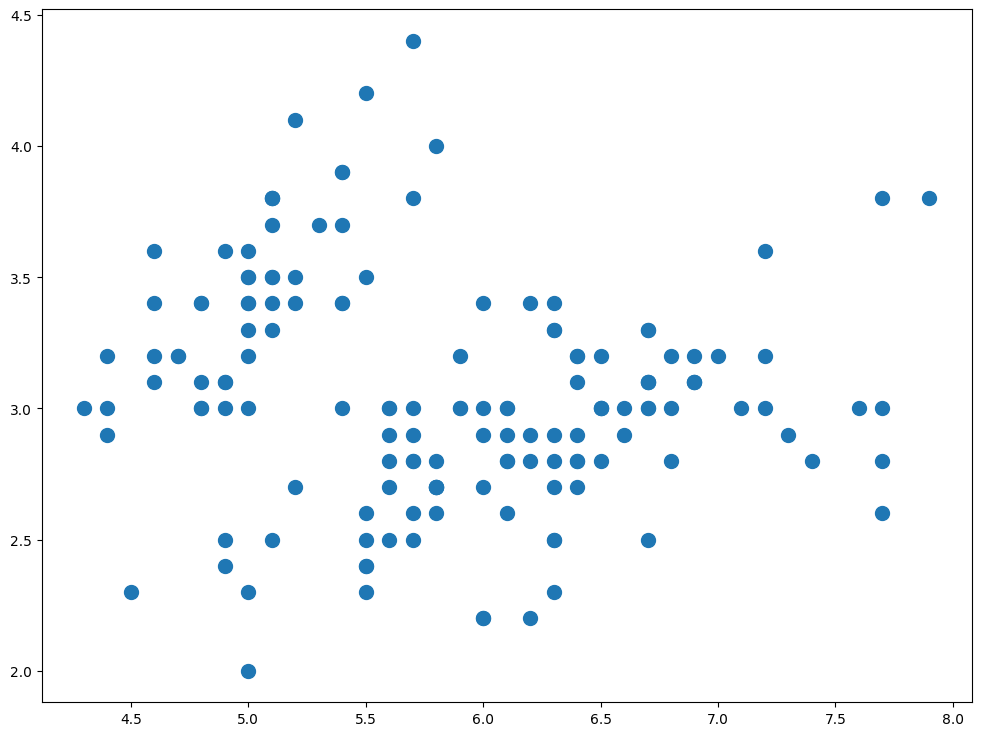

In [47]:
plt.figure(figsize=(12,9))
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

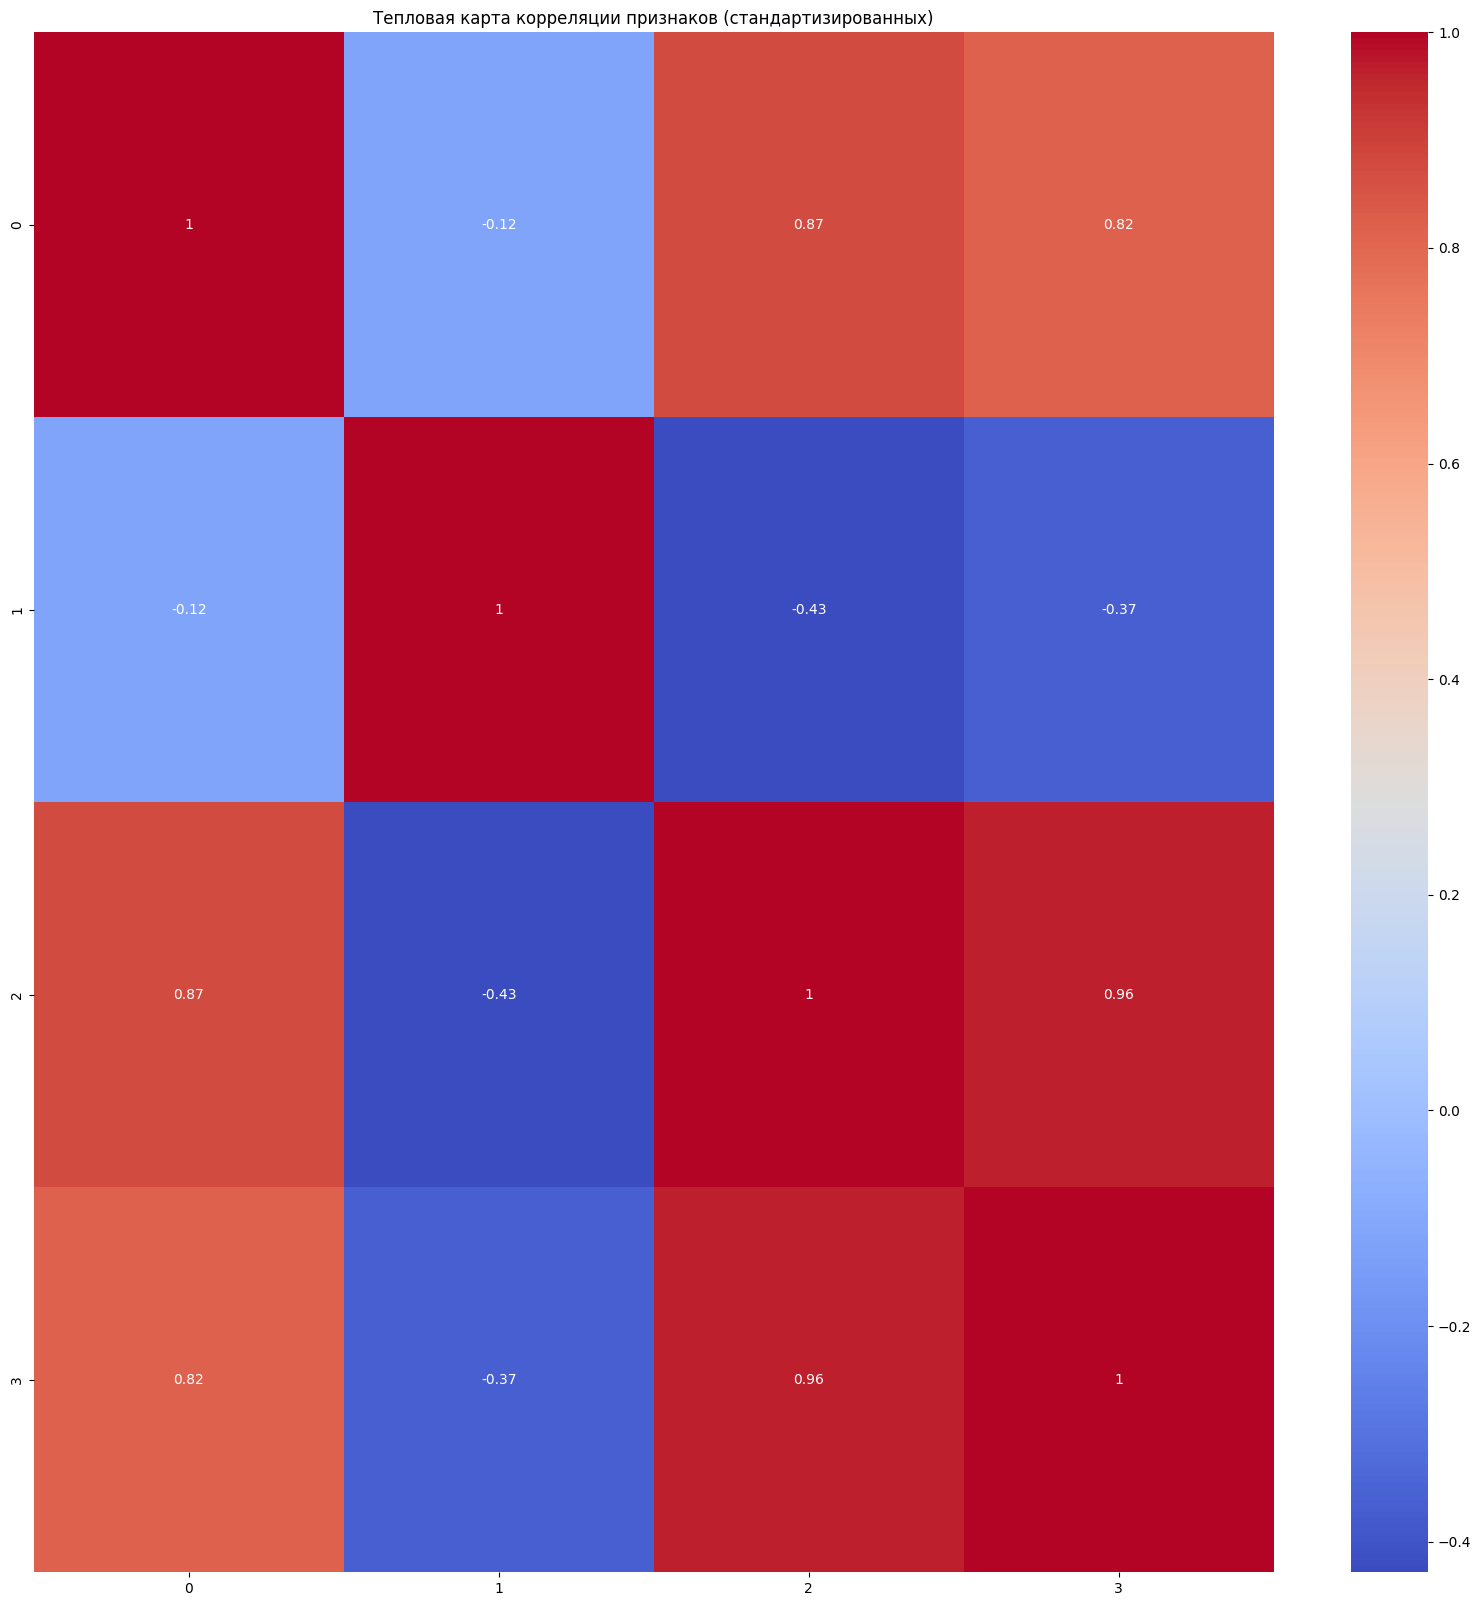

In [49]:
plt.figure(figsize=(20, 20))
sns.heatmap(pd.DataFrame(X_scaled).corr(), annot=True, cmap='coolwarm')
plt.title("Тепловая карта корреляции признаков (стандартизированных)")
plt.show()

In [50]:
kmeans = KMeans(init = 'random')
y_kmeans = kmeans.fit_predict(X_scaled)
y_kmeans

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([7, 5, 5, 5, 7, 2, 7, 7, 5, 5, 7, 7, 5, 5, 2, 2, 2, 7, 2, 7, 7, 7,
       7, 7, 7, 5, 7, 7, 7, 5, 5, 7, 2, 2, 5, 5, 7, 7, 5, 7, 7, 5, 5, 7,
       7, 5, 7, 5, 7, 7, 4, 0, 4, 6, 0, 0, 0, 6, 0, 6, 6, 0, 6, 0, 0, 0,
       0, 6, 3, 6, 0, 0, 3, 0, 0, 0, 0, 4, 0, 6, 6, 6, 6, 3, 0, 0, 0, 3,
       0, 6, 6, 0, 6, 6, 6, 0, 0, 0, 6, 0, 4, 3, 1, 3, 4, 1, 6, 1, 3, 4,
       4, 3, 4, 3, 3, 4, 4, 4, 1, 3, 4, 3, 1, 3, 4, 4, 3, 0, 3, 1, 1, 4,
       3, 3, 3, 1, 4, 4, 0, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 0], dtype=int32)

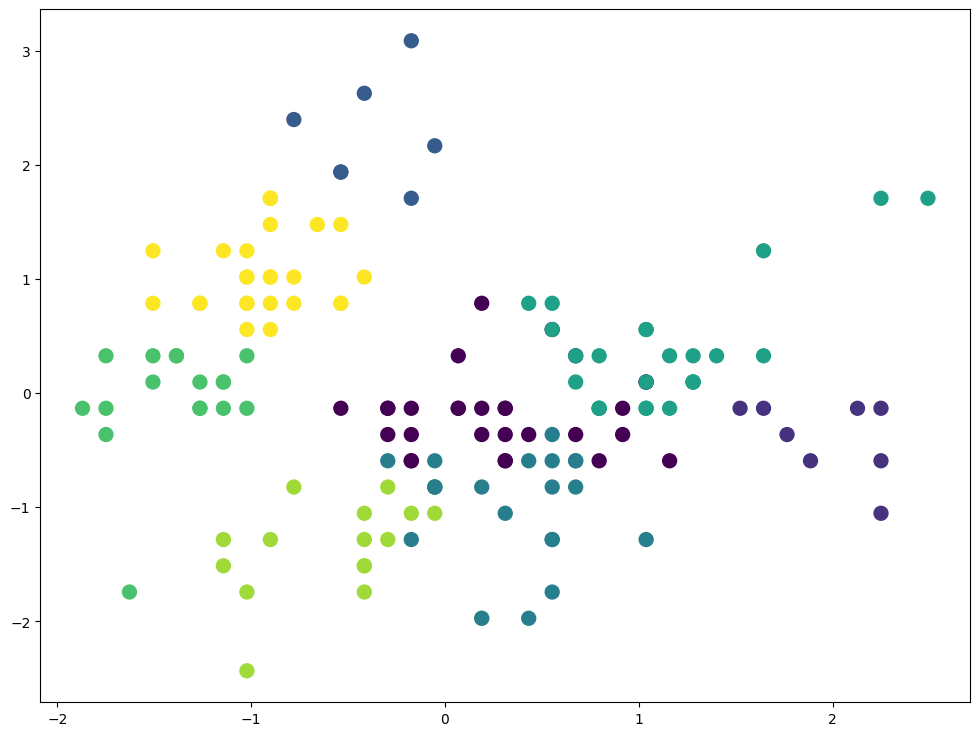

In [51]:
plt.figure(figsize=(12,9))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=100)
plt.show()

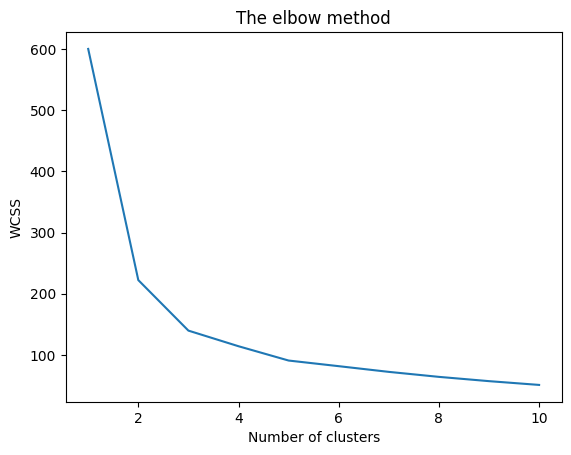

In [52]:
scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_scaled)
    scores.append(kmeans.inertia_)
plt.plot(range(1, 11), scores)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

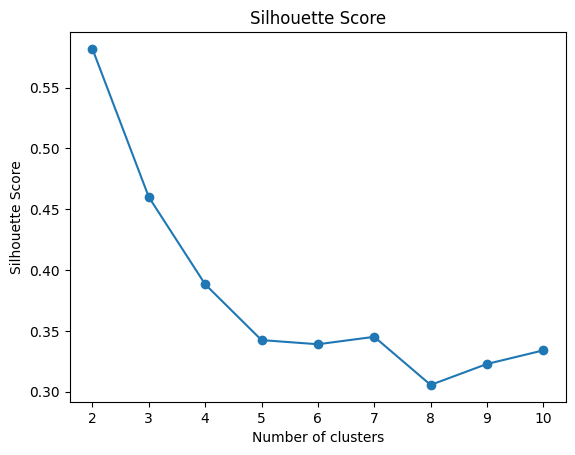

In [53]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [54]:
kmeans = KMeans(n_clusters = 3, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_scaled)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

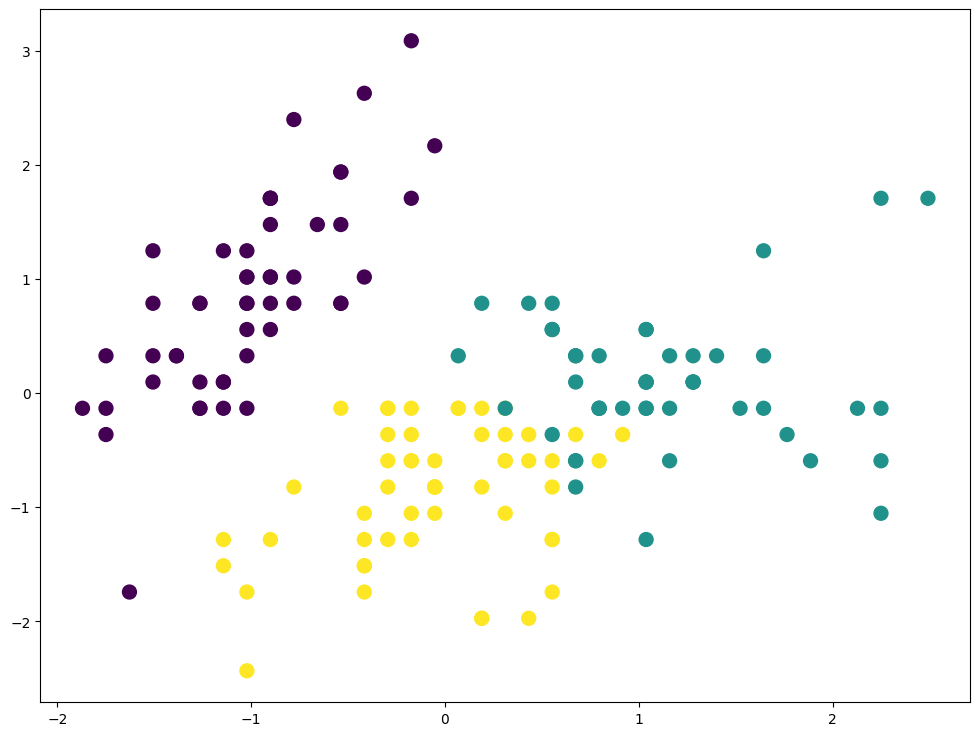

In [55]:
plt.figure(figsize=(12,9))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=100)
plt.show()

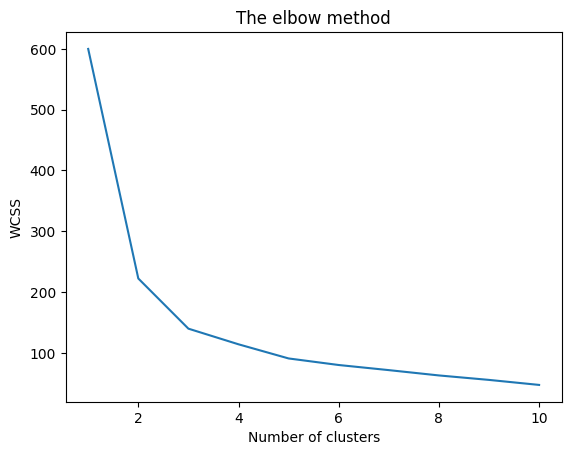

In [56]:
scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_scaled)
    scores.append(kmeans.inertia_)
plt.plot(range(1, 11), scores)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

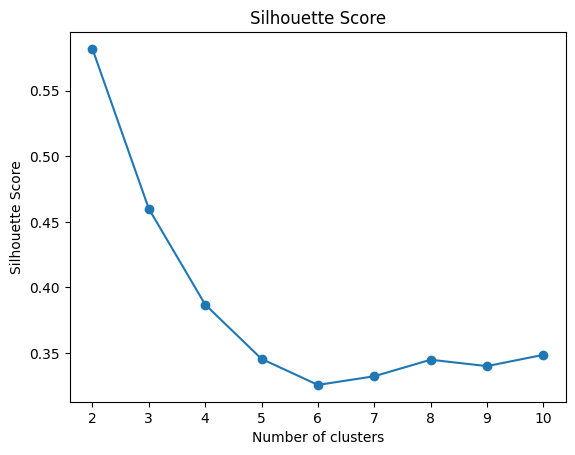

In [57]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [58]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_scaled)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

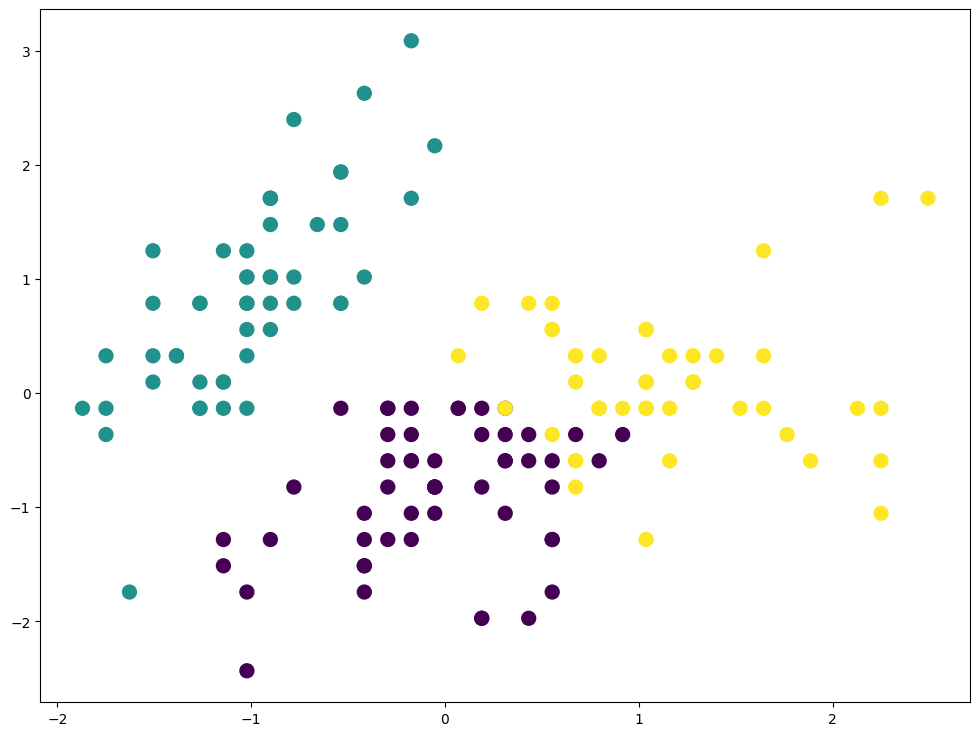

In [59]:
plt.figure(figsize=(12,9))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=100)
plt.show()